<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_SRAL_SSHA.ipynb"><< SRAL sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_SRAL_WS.ipynb">SRAL wind speed >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **<a href="1_1_SRAL_data_access_HDA_Data_Store.ipynb" target="_blank">1_1_SRAL_data_access_HDA_Data_Store.ipynb</a>**; this will download the required SRAL products for this notebook.
</div>
<hr>

# 1.7 SRAL significant wave height 


### Data used

| Product Description  | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">link</a>|

### Learning outcomes

At the end of this notebook you will know;
* Objective

### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Reading SRAL level-2 SWH data](#section1)

<hr>

In [1]:
# library imports
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading SRAL level-2 SWH data
[Back to top](#TOC_TOP)

</div>

In [2]:
# selecting SAFE directories
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20220218T110400_20220218T115102_20220316T035351_2822_062_365______MAR_O_NT_004.SEN3')
measurement_file = "standard_measurement.nc"

In [3]:
# read data
ds = xr.open_dataset(os.path.join(SAFE_directory, measurement_file))
ds.close()

In [4]:
flags_swh = np.array(ds.swh_ocean_qual_01_ku).astype(float)
flags_swh[flags_swh != 0.0] = 1.15
flags_swh[flags_swh == 0.0] = np.nan

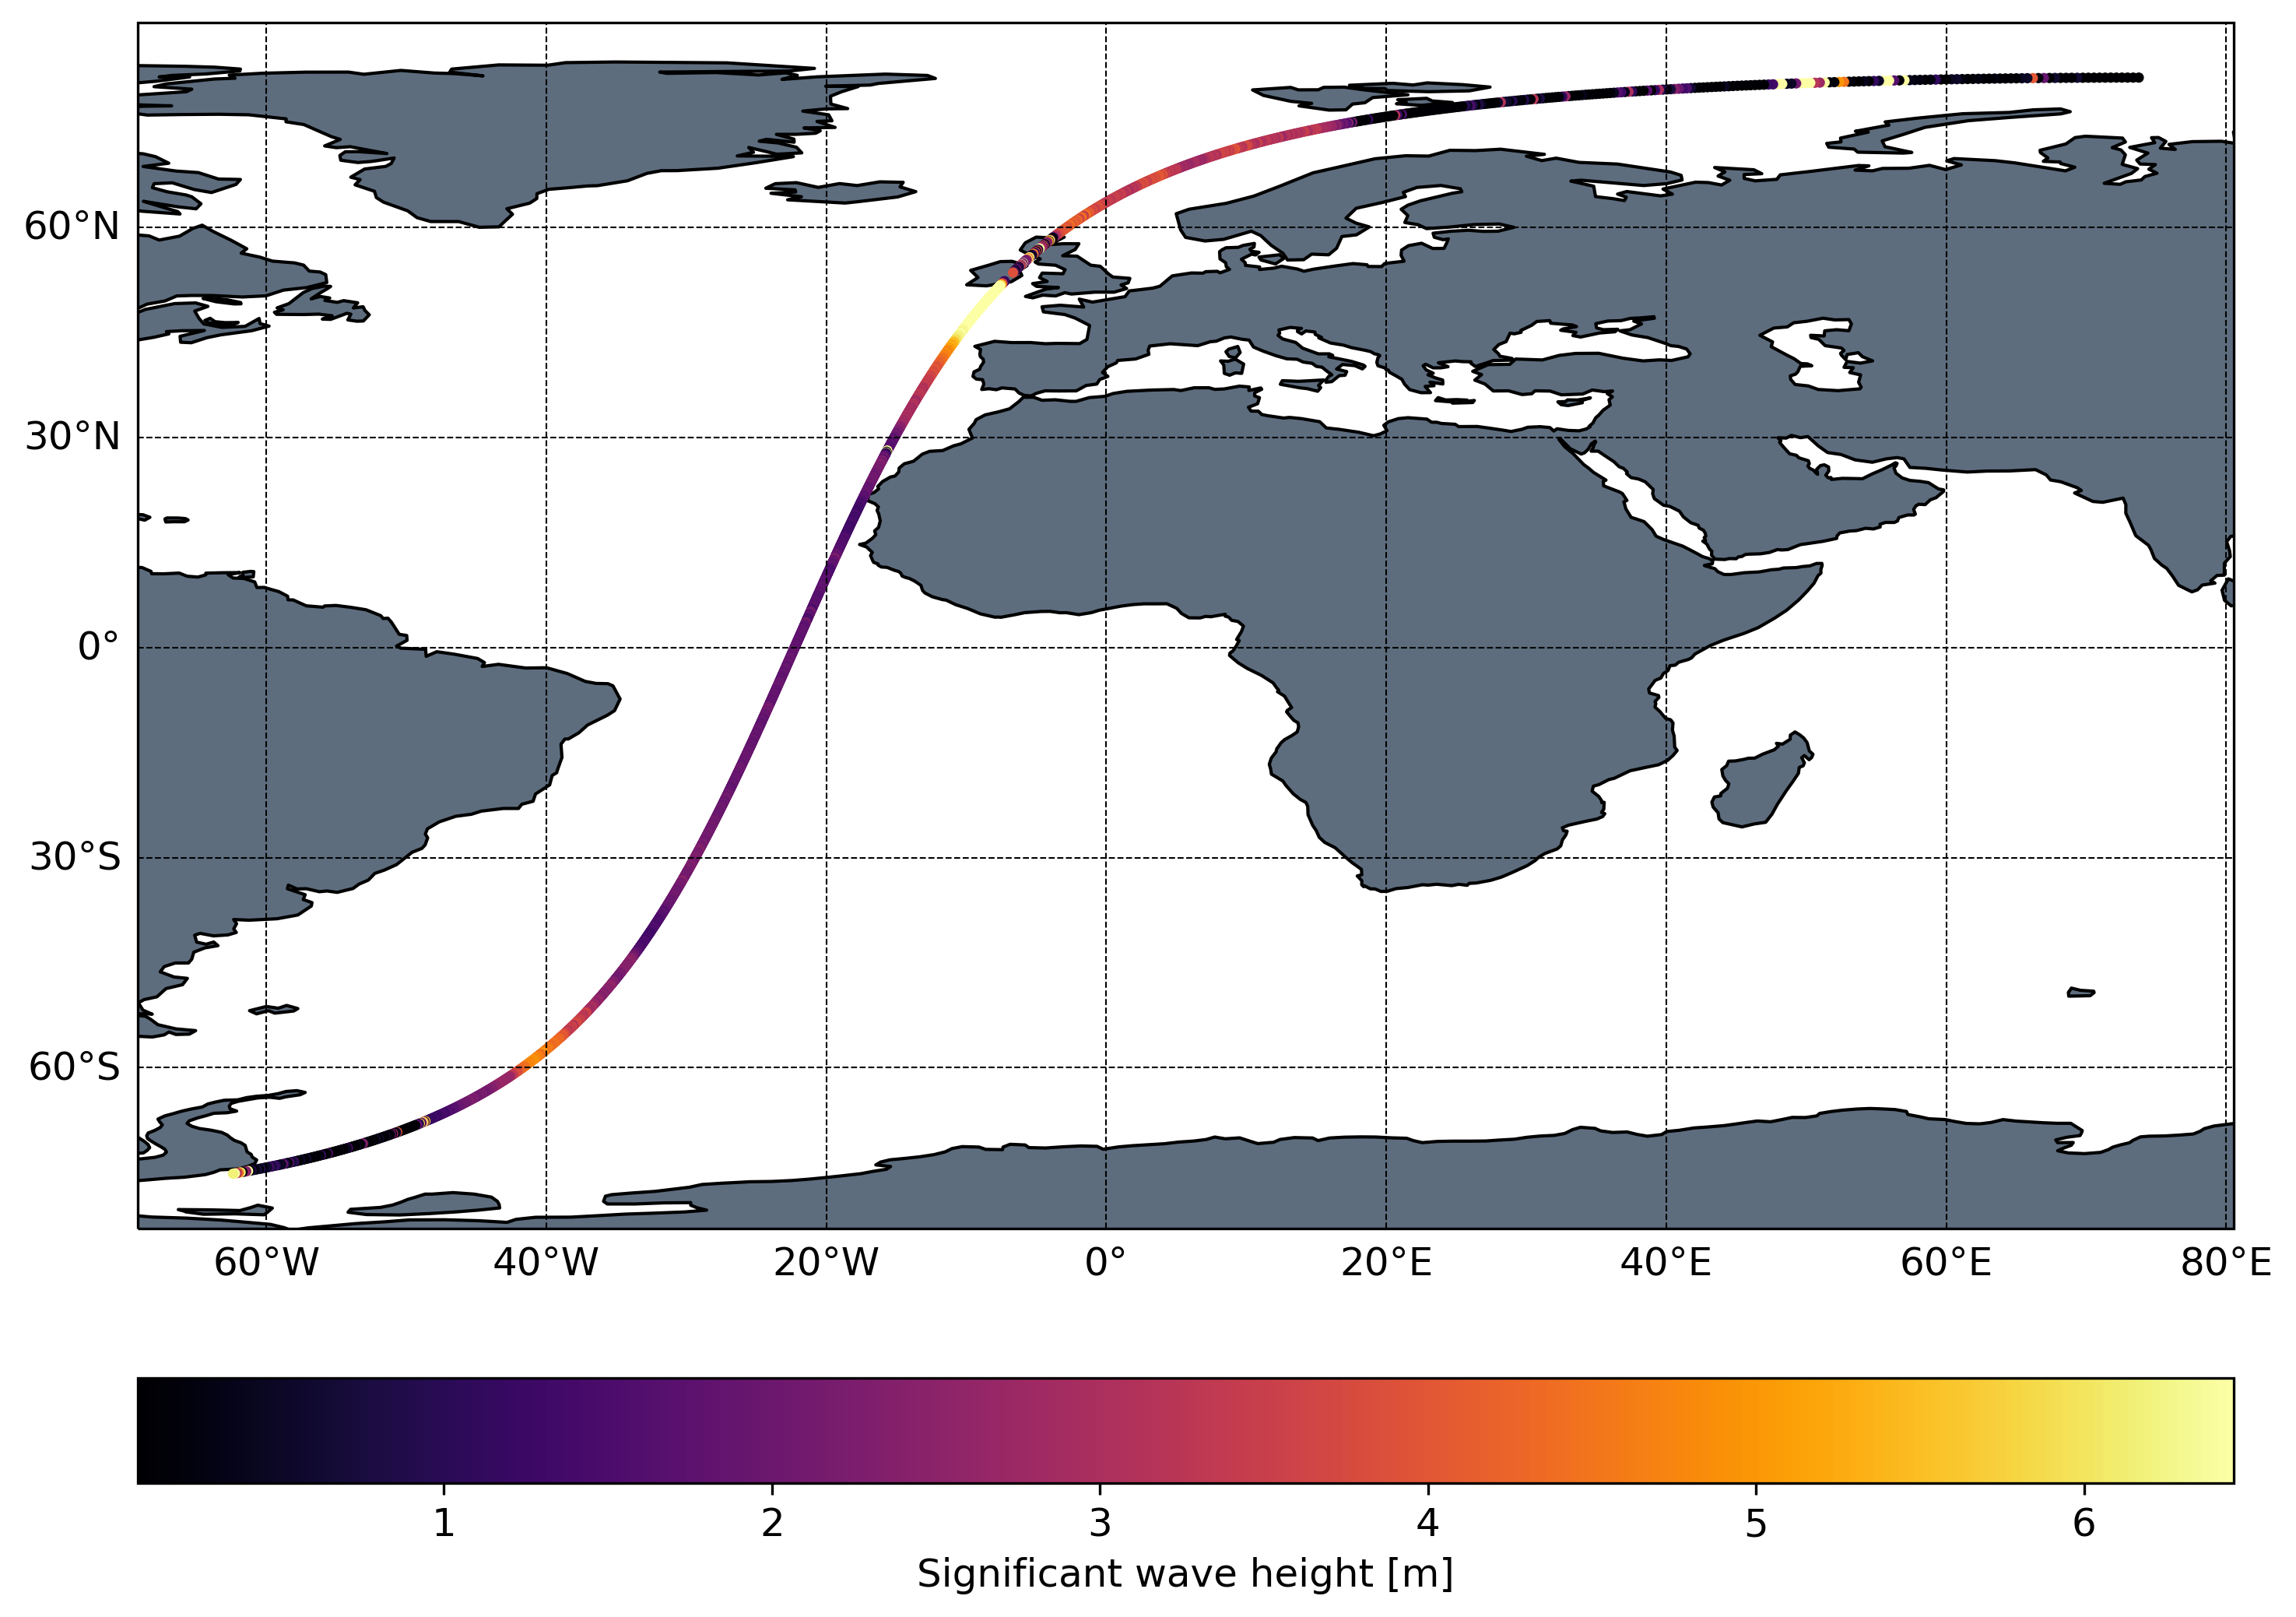

In [21]:
# plot the flagged track data for geophysical variables
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

labels = ['Significant wave height [m]']
plot_vars = [ds.swh_ocean_01_ku]
plot_flags = [flags_swh]
cmaps = ["inferno"]

init = True
for label, plot_var, plot_flag, cmap in zip(labels, plot_vars, plot_flags, cmaps):

    vmin = np.nanpercentile(plot_var, 5)
    vmax = np.nanpercentile(plot_var, 95)
    plot_var[plot_flag == 0] = np.nan
    f1 = m.scatter(ds.lon_01, ds.lat_01, c=plot_var, s=10, cmap=cmap, marker='o', edgecolors=None, 
                   linewidth=0.0, vmin=vmin, vmax=vmax)

    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
    g1.top_labels = False
    g1.right_labels = False
    g1.xlabel_style = {'color': 'black'}
    g1.ylabel_style = {'color': 'black'}
    m.set(facecolor = "1.0")
    m.set_aspect(0.5)
    
    cbar = plt.colorbar(f1, ax=m, orientation="horizontal", fraction=0.05, pad=0.07)
    cbar.set_label(label)

plt.tight_layout()
plt.savefig('1_7_SRAL_SWH.png')

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_SRAL_SSHA.ipynb"><< SRAL sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_SRAL_WS.ipynb">SRAL wind speed >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>